<a href="https://colab.research.google.com/github/IshaanKetchup/ML-tools-and-techniques/blob/main/Deepfake_Vision_Transformer_1_Epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install timm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import kagglehub
import os
# Download dataset
path = kagglehub.dataset_download("manjilkarki/deepfake-and-real-images")
print("Path to dataset files:", path)

dataset_path = "/root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset"
train_dir = os.path.join(dataset_path, "Train")
val_dir = os.path.join(dataset_path, "Validation")


Path to dataset files: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1


In [ ]:
import os
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import timm

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Datasets and loaders
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

In [ ]:



# Model: Vision Transformer
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=2)
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
print("GPU available:", torch.cuda.is_available())


GPU available: True


In [ ]:
import time

start = time.time()
for i, (images, labels) in enumerate(train_loader):
    print(f"Batch {i+1}: {images.shape}, {labels.shape}")
    if i == 2: break
print("Data loading test complete in", time.time() - start, "seconds")


Batch 1: torch.Size([32, 3, 224, 224]), torch.Size([32])
Batch 2: torch.Size([32, 3, 224, 224]), torch.Size([32])
Batch 3: torch.Size([32, 3, 224, 224]), torch.Size([32])
Data loading test complete in 0.5335745811462402 seconds


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [ ]:
for epoch in range(1, 2):  # just run one for now
    model.train()
    start_time = time.time()
    total_loss = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        if batch_idx % 10 == 0:
            print(f"Epoch {epoch}, Batch {batch_idx}, Loss: {loss.item():.4f}")
    print(f"Epoch {epoch} done in {time.time() - start_time:.2f}s, Total Loss: {total_loss:.4f}")


Epoch 1, Batch 0, Loss: 0.1355
Epoch 1, Batch 10, Loss: 0.3841
Epoch 1, Batch 20, Loss: 0.2513
Epoch 1, Batch 30, Loss: 0.3207
Epoch 1, Batch 40, Loss: 0.2539
Epoch 1, Batch 50, Loss: 0.1993
Epoch 1, Batch 60, Loss: 0.3361
Epoch 1, Batch 70, Loss: 0.4181
Epoch 1, Batch 80, Loss: 0.2478
Epoch 1, Batch 90, Loss: 0.2385
Epoch 1, Batch 100, Loss: 0.3400
Epoch 1, Batch 110, Loss: 0.2212
Epoch 1, Batch 120, Loss: 0.1996
Epoch 1, Batch 130, Loss: 0.4116
Epoch 1, Batch 140, Loss: 0.3441
Epoch 1, Batch 150, Loss: 0.3699
Epoch 1, Batch 160, Loss: 0.3152
Epoch 1, Batch 170, Loss: 0.2265
Epoch 1, Batch 180, Loss: 0.3296
Epoch 1, Batch 190, Loss: 0.2823
Epoch 1, Batch 200, Loss: 0.2071
Epoch 1, Batch 210, Loss: 0.3216
Epoch 1, Batch 220, Loss: 0.2708
Epoch 1, Batch 230, Loss: 0.2753
Epoch 1, Batch 240, Loss: 0.4518
Epoch 1, Batch 250, Loss: 0.3099
Epoch 1, Batch 260, Loss: 0.1456
Epoch 1, Batch 270, Loss: 0.2477
Epoch 1, Batch 280, Loss: 0.2442
Epoch 1, Batch 290, Loss: 0.2983
Epoch 1, Batch 300, L

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch


In [ ]:
model.eval()


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (norm): Identity()
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False

In [ ]:
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:  # or test_loader
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


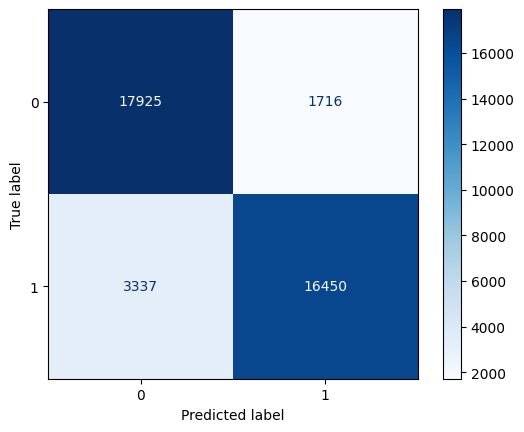

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
print(cm)


[[17925  1716]
 [ 3337 16450]]
